<a href="https://colab.research.google.com/github/boshuaiYu/CaiCai_DL/blob/main/CaiCai_DL_Week4.4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**一、逻辑回归的实现**

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy

import torch
from torch import nn,optim
from torch.utils.data import TensorDataset,Dataset,DataLoader
from torch.utils.tensorboard import SummaryWriter

In [14]:
import sys
sys.path.append("/content/drive/MyDrive/Colab Notebooks/week4_function")
from torchlearning import *

##**1.1 逻辑回归手动实现**

###**1.1.1 数据集生成**

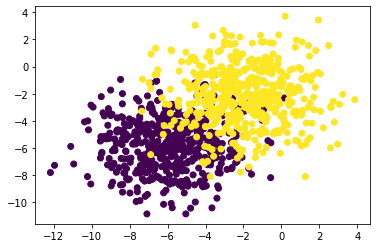

In [19]:
torch.manual_seed(420)
features,labels = tensorGenCla(num_classes=2,bias=True)
plt.scatter(features[:,0],features[:,1],c=labels);

In [98]:
features

tensor([[-6.0141, -4.9911],
        [-4.6593, -6.7657],
        [-5.9395, -5.2347],
        ...,
        [-1.0377, -1.9139],
        [-3.5465, -4.2140],
        [-6.6681, -0.6065]])

###**1.1.2 建模过程**

####**1.1.2.1 模型选择**

In [30]:
def sigmoid(z): # 激活函数
  return 1/(1+torch.exp(-z))

In [31]:
def logistic(X,w): # 逻辑回归模型
  return sigmoid(torch.mm(X,w))

In [32]:
def cal(sigma,p=0.5): # 分类函数
  return((sigma>=p).float())

In [39]:
def accuracy(sigma,y): # 准确率函数
  acc_bool = cal(sigma).flatten() == y.flatten()
  acc = torch.mean(acc_bool.float())
  return acc

####**1.1.2.2 定义损失函数**

In [37]:
def cross_entropy(sigma,y):
  return -(1/y.numel())*(torch.sum((y*torch.log(sigma)+(1-y)*torch.log(1-sigma))))

####**1.1.2.3 定义优化算法**

In [35]:
def sgd(params,lr):
  params.data -= params.grad*lr
  params.grad.zero_()

####**1.1.2.4 训练模型**

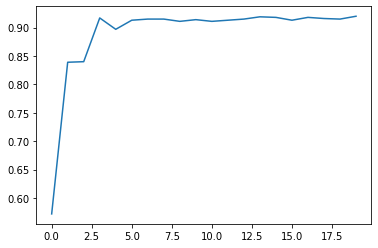

In [54]:
torch.manual_seed(420)

batch_size = 10
lr = 0.03
num_epochs = 20
w = torch.ones(3,1,requires_grad=True)

train_acc = []
net = logistic
loss = cross_entropy

for i in range(num_epochs):
  for epoch in range(i):
    for X,y in data_iter(batch_size,features,labels):
      l = loss(net(X,w),y)
      l.backward()
      sgd(w,lr)
  train_acc.append(accuracy(net(features,w),labels))

plt.plot(list(range(num_epochs)),train_acc);

In [97]:
train_acc

[tensor(0.6220),
 tensor(0.7350),
 tensor(0.7350),
 tensor(0.7280),
 tensor(0.7340),
 tensor(0.7320),
 tensor(0.7310),
 tensor(0.7400),
 tensor(0.7360),
 tensor(0.7310),
 tensor(0.7290),
 tensor(0.7340),
 tensor(0.7270),
 tensor(0.7260),
 tensor(0.7360),
 tensor(0.7420),
 tensor(0.7300),
 tensor(0.7310),
 tensor(0.7280),
 tensor(0.7390)]

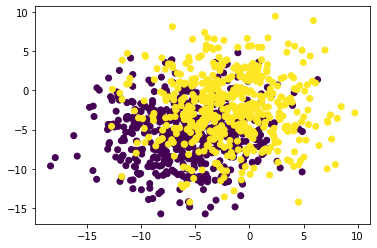

In [58]:
torch.manual_seed(420)
features,labels = tensorGenCla(num_classes=2,bias=True,deg_dispersion=[4,4])

plt.scatter(features[:,0],features[:,1],c=labels);

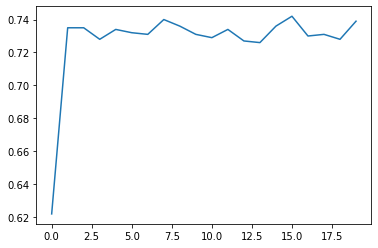

In [59]:
torch.manual_seed(420)

batch_size = 10
lr = 0.03
num_epochs = 20
w = torch.ones(3,1,requires_grad=True)

train_acc = []
net = logistic
loss = cross_entropy

for i in range(num_epochs):
  for epoch in range(i):
    for X,y in data_iter(batch_size,features,labels):
      l = loss(net(X,w),y)
      l.backward()
      sgd(w,lr)
  train_acc.append(accuracy(net(features,w),labels))

plt.plot(list(range(num_epochs)),train_acc);

In [60]:
train_acc

[tensor(0.6220),
 tensor(0.7350),
 tensor(0.7350),
 tensor(0.7280),
 tensor(0.7340),
 tensor(0.7320),
 tensor(0.7310),
 tensor(0.7400),
 tensor(0.7360),
 tensor(0.7310),
 tensor(0.7290),
 tensor(0.7340),
 tensor(0.7270),
 tensor(0.7260),
 tensor(0.7360),
 tensor(0.7420),
 tensor(0.7300),
 tensor(0.7310),
 tensor(0.7280),
 tensor(0.7390)]

##**1.2 逻辑回归快速实现**

In [61]:
batch_size = 10
lr = 0.03
num_epochs = 3

In [62]:
torch.manual_seed(420)

features,labels = tensorGenCla(num_classes=2)
labels = labels.float()                
data = TensorDataset(features,labels)
batchData = DataLoader(data,batch_size,shuffle=True)

In [71]:
class logisticR(nn.Module):
  def __init__(self,in_features=2,out_features=1):
    super(logisticR,self).__init__()
    self.linear = nn.Linear(in_features,out_features)

  def forward(self,x):
    out = self.linear(x)
    return out

In [72]:
logic_model = logisticR()
criterion = nn.BCEWithLogitsLoss()

In [78]:
optimizer = optim.SGD(logic_model.parameters(),lr=lr)

In [85]:
def fit(net,criterion,optimizer,batchData,epochs):
  for epoch in range(epochs):
    for X,y in batchData:
      zhat = net.forward(X)
      loss = criterion(zhat,y)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

In [86]:
torch.manual_seed(420)
fit(
    net=logic_model,
    criterion=criterion,
    optimizer=optimizer,
    batchData=batchData,
    epochs=num_epochs
)


In [88]:
logic_model

logisticR(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)

In [89]:
list(logic_model.parameters())

[Parameter containing:
 tensor([[0.2047, 0.1653]], requires_grad=True), Parameter containing:
 tensor([0.8635], requires_grad=True)]

In [95]:
def acc_zhat(zhat,y):
  sigma = sigmoid(zhat)
  return accuracy(sigma,y)

In [96]:
acc_zhat(logic_model(features),labels)

tensor(0.7920)